## NN-IRIS

Create a neural network model to predict an Iris class

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import numpy as np

2024-04-09 14:54:13.155747: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 14:54:14.794723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## 1. Prepare data

### 1.1 Read data

In [2]:
columns = pd.read_csv("data/iris names.txt", names=['names'])
columns

,names
0,sepal length in cm
1,sepal width in cm
2,petal length in cm
3,petal width in cm
4,class


In [3]:
df = pd.read_csv("data/iris2.data", sep="\t", names=columns["names"])
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


### 1.2 Split data

Split data to train and test subsets using `train_test_split()`

In [4]:
X = df.drop("class", axis=1)
y = df["class"]

In [5]:
X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = pd.get_dummies(y)
y

,1,2,3
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [8]:
X_train

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,5.1,3.5,1.4,0.2
55,5.7,2.8,4.5,1.3
82,5.8,2.7,3.9,1.2
75,6.6,3.0,4.4,1.4
47,4.6,3.2,1.4,0.2
...,...,...,...,...
121,5.6,2.8,4.9,2.0
89,5.5,2.5,4.0,1.3
8,4.4,2.9,1.4,0.2
137,6.4,3.1,5.5,1.8


In [9]:
y_train

,1,2,3
0,True,False,False
55,False,True,False
82,False,True,False
75,False,True,False
47,True,False,False
...,...,...,...
121,False,False,True
89,False,True,False
8,True,False,False
137,False,False,True


In [10]:
X_val

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
57,4.9,2.4,3.3,1.0
52,6.9,3.1,4.9,1.5
107,7.3,2.9,6.3,1.8
20,5.4,3.4,1.7,0.2
138,6.0,3.0,4.8,1.8
39,5.1,3.4,1.5,0.2
91,6.1,3.0,4.6,1.4
65,6.7,3.1,4.4,1.4
53,5.5,2.3,4.0,1.3
132,6.4,2.8,5.6,2.2


In [11]:
y_val

,1,2,3
57,False,True,False
52,False,True,False
107,False,False,True
20,True,False,False
138,False,False,True
39,True,False,False
91,False,True,False
65,False,True,False
53,False,True,False
132,False,False,True


In [12]:
X_test

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
101,5.8,2.7,5.1,1.9
83,6.0,2.7,5.1,1.6
2,4.7,3.2,1.3,0.2
49,5.0,3.3,1.4,0.2
80,5.5,2.4,3.8,1.1
69,5.6,2.5,3.9,1.1
118,7.7,2.6,6.9,2.3
62,6.0,2.2,4.0,1.0
85,6.0,3.4,4.5,1.6
144,6.7,3.3,5.7,2.5


In [13]:
y_test

,1,2,3
101,False,False,True
83,False,True,False
2,True,False,False
49,True,False,False
80,False,True,False
69,False,True,False
118,False,False,True
62,False,True,False
85,False,True,False
144,False,False,True


In [14]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((107, 4), (107, 3), (20, 4), (20, 3), (23, 4), (23, 3))

## 2. Create model

### 2.1. Model definition

In [15]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

/home/kostas/Documents/git/Iris_classification/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-09 14:54:16.408241: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 14:54:16.409260: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to d

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

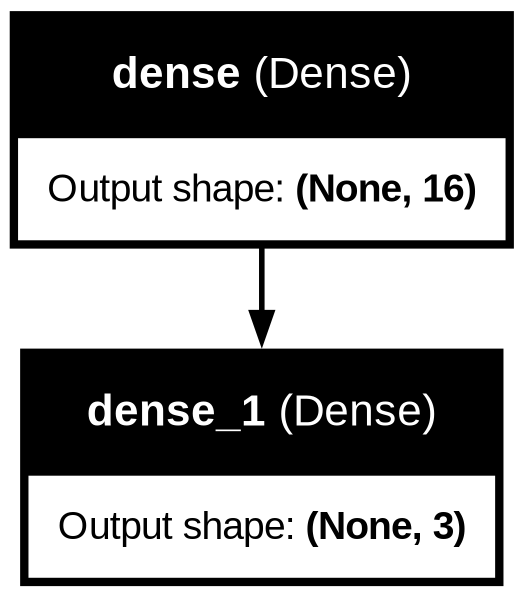

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='images/model_plot.png', show_shapes=True, show_layer_names=True)

### 2.2. Model compilation

In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'recall', 'precision', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])

### 2.3. Model training

In [18]:
# Train the model!
model.fit(X_train, y_train,
          batch_size=12,
          epochs=200,
          validation_data=(X_val, y_val))

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - FalseNegatives: 45.4000 - FalsePositives: 45.4000 - TrueNegatives: 83.8000 - TruePositives: 19.2000 - accuracy: 0.2881 - loss: 2.2469 - precision: 0.2881 - recall: 0.2881 - val_FalseNegatives: 15.0000 - val_FalsePositives: 15.0000 - val_TrueNegatives: 25.0000 - val_TruePositives: 5.0000 - val_accuracy: 0.2500 - val_loss: 2.2179 - val_precision: 0.2500 - val_recall: 0.2500
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - FalseNegatives: 40.9000 - FalsePositives: 36.0000 - TrueNegatives: 93.2000 - TruePositives: 23.7000 - accuracy: 0.3873 - loss: 1.5181 - precision: 0.4072 - recall: 0.3873 - val_FalseNegatives: 15.0000 - val_FalsePositives: 11.0000 - val_TrueNegatives: 29.0000 - val_TruePositives: 5.0000 - val_accuracy: 0.2500 - val_loss: 1.7093 - val_precision: 0.3125 - val_recall: 0.2500
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - FalseNegatives: 43.4000 - FalsePositives: 23.9000 - TrueNegatives: 105.3000 - TruePositives: 21.

### 2.4. Model evaluation

In [19]:
# Evaluate the model on the test data
_, FN, FP, TN, TP, accuracy, precision, recall = model.evaluate(X_test, y_test)
mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test recall: {recall*100:.2f}%")
print(f"Test precision: {precision*100:.2f}%")
print(f"TP: {TP}")
print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")
print(f"Test Matthew coefficient: {mcc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - FalseNegatives: 2.0000 - FalsePositives: 2.0000 - TrueNegatives: 44.0000 - TruePositives: 21.0000 - accuracy: 0.9130 - loss: 0.1393 - precision: 0.9130 - recall: 0.9130
Test accuracy: 91.30%
Test recall: 91.30%
Test precision: 91.30%
TP: 21.0
TN: 44.0
FP: 2.0
FN: 2.0
Test Matthew coefficient: 86.96%
